# EPI Scenario 1
## Create a SEIcImRD base model
We start by creating a base model that can be extended further to the different use cases

In [1]:
# General imports
from mira.metamodel import *
from mira.examples.concepts import susceptible, exposed, infected, recovered, dead

In [2]:
# Build base model

# Create two infected concepts, one for 'mild' and one for 'case'
infected_mild = infected.with_context(status="mild")
infected_case = infected.with_context(status="case")
exposed.display_name = "exposed_population"

# S -> E
exposure = GroupedControlledConversion(
    subject=susceptible,
    outcome=exposed,
    controllers=[infected_mild, infected_case],
)

# E -> {I_mild, I_case}
infection_mild = NaturalConversion(
    subject=exposed,
    outcome=infected_mild,
)
infection_case = NaturalConversion(
    subject=exposed,
    outcome=infected_case,
)

# I_mild -> R
recovery_mild = NaturalConversion(
    subject=infected_mild,
    outcome=recovered,
)
# I_case -> {R, D}
recovery_case = NaturalConversion(
    subject=infected_case,
    outcome=recovered,
)
death_case = NaturalConversion(
    subject=infected_case,
    outcome=dead,
)

seird_base = TemplateModel(
    templates=[
        exposure,
        infection_mild,
        recovery_mild,
        infection_case,
        recovery_case,
        death_case,
    ],
)

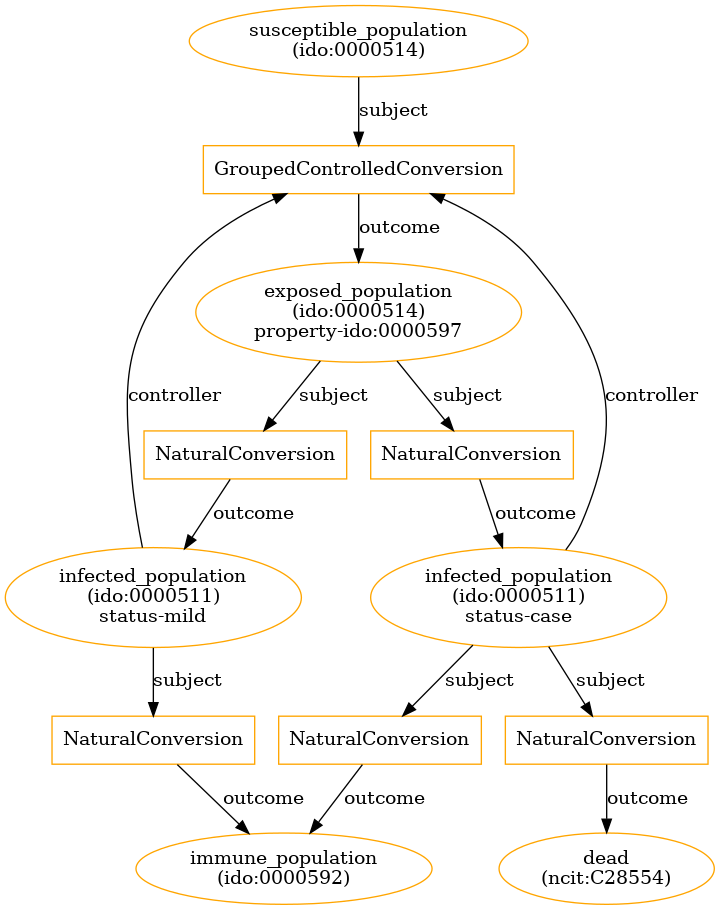

In [3]:
# Show graph of the base model
seird_base.draw_jupyter(use_display_name=True)